<a href="https://colab.research.google.com/github/MdSyfulIslam/ML/blob/main/Lab07_KMeans_LabTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')

Saving Mall_Customers.csv to Mall_Customers (2).csv
User uploaded file "Mall_Customers (2).csv"


In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [20]:
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df = pd.read_csv("Mall_Customers.csv")
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

In [22]:
X = df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']]

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

In [24]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


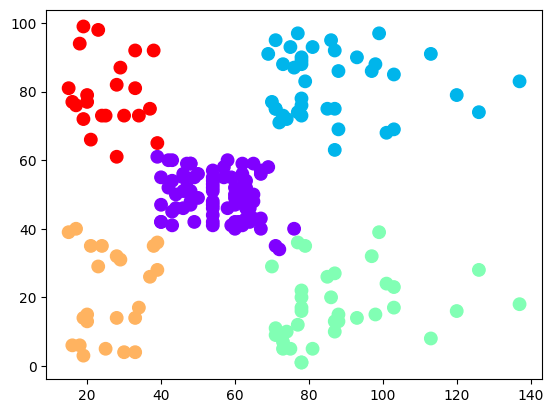

In [26]:
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score_(1-100)'],
            c=df['Cluster'], cmap='rainbow', s=80)

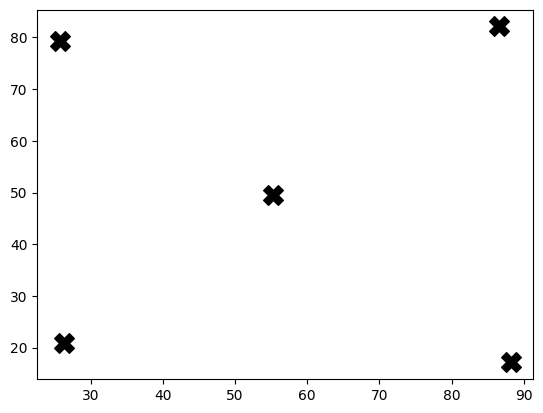

In [27]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='X', s=200, label='Centroids')

/tmp/ipython-input-30-1808210244.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


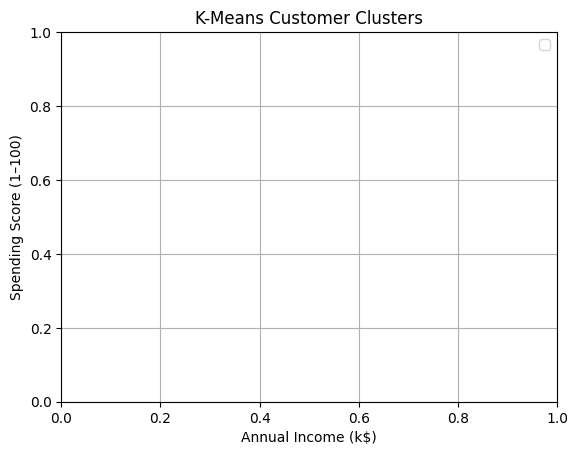

In [30]:
plt.title("K-Means Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['Annual_Income_(k$)', 'Spending_Score_(1-100)']], df['Cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5539
